In [62]:
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import missingno as mso
import matplotlib.pyplot as plt
from warnings import filterwarnings
from joblib import load, dump
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

Loading the Algerian Fores Fire Dataset

In [63]:
df=pd.read_csv('C:/Users/Navneet/Documents/Machine Learning Nov/Datasets/Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [64]:
df.shape

(246, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [66]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [67]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [68]:
df.iloc[121:125:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


# Data Cleaning

Dropping row no 122 and 123

In [69]:
df.drop([122, 123], inplace=True)

In [70]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [71]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [72]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

Checking the Column Headers

In [73]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Removing unnecessary space in column headers using str.strip()

In [74]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Dropping rows with null values

In [75]:
df.dropna(inplace=True)

Converting the necessary column detaye to int

In [76]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [77]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', "Region"]] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [78]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

Values in df[Classes] has unnecessary spaces that are removed by str.strip()

In [79]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [80]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

Converting the necessary column Datatype to Float

In [81]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [82]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [83]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

Dropping the year column as the data is for the same year

In [84]:
df1 = df.drop(['year'], axis=1)

In [85]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


# 3. Exploratory Data Analysis

Encoding not fire as 0 and fire as 1

In [86]:
set(df1.Classes)

{'fire', 'not fire'}

In [87]:
label_encoder = LabelEncoder()
# Encode labels in column 'Classes' 
df1['Classes'] = label_encoder.fit_transform(df1['Classes'])
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [88]:
set(df1.Classes)

{0, 1}

In [89]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197


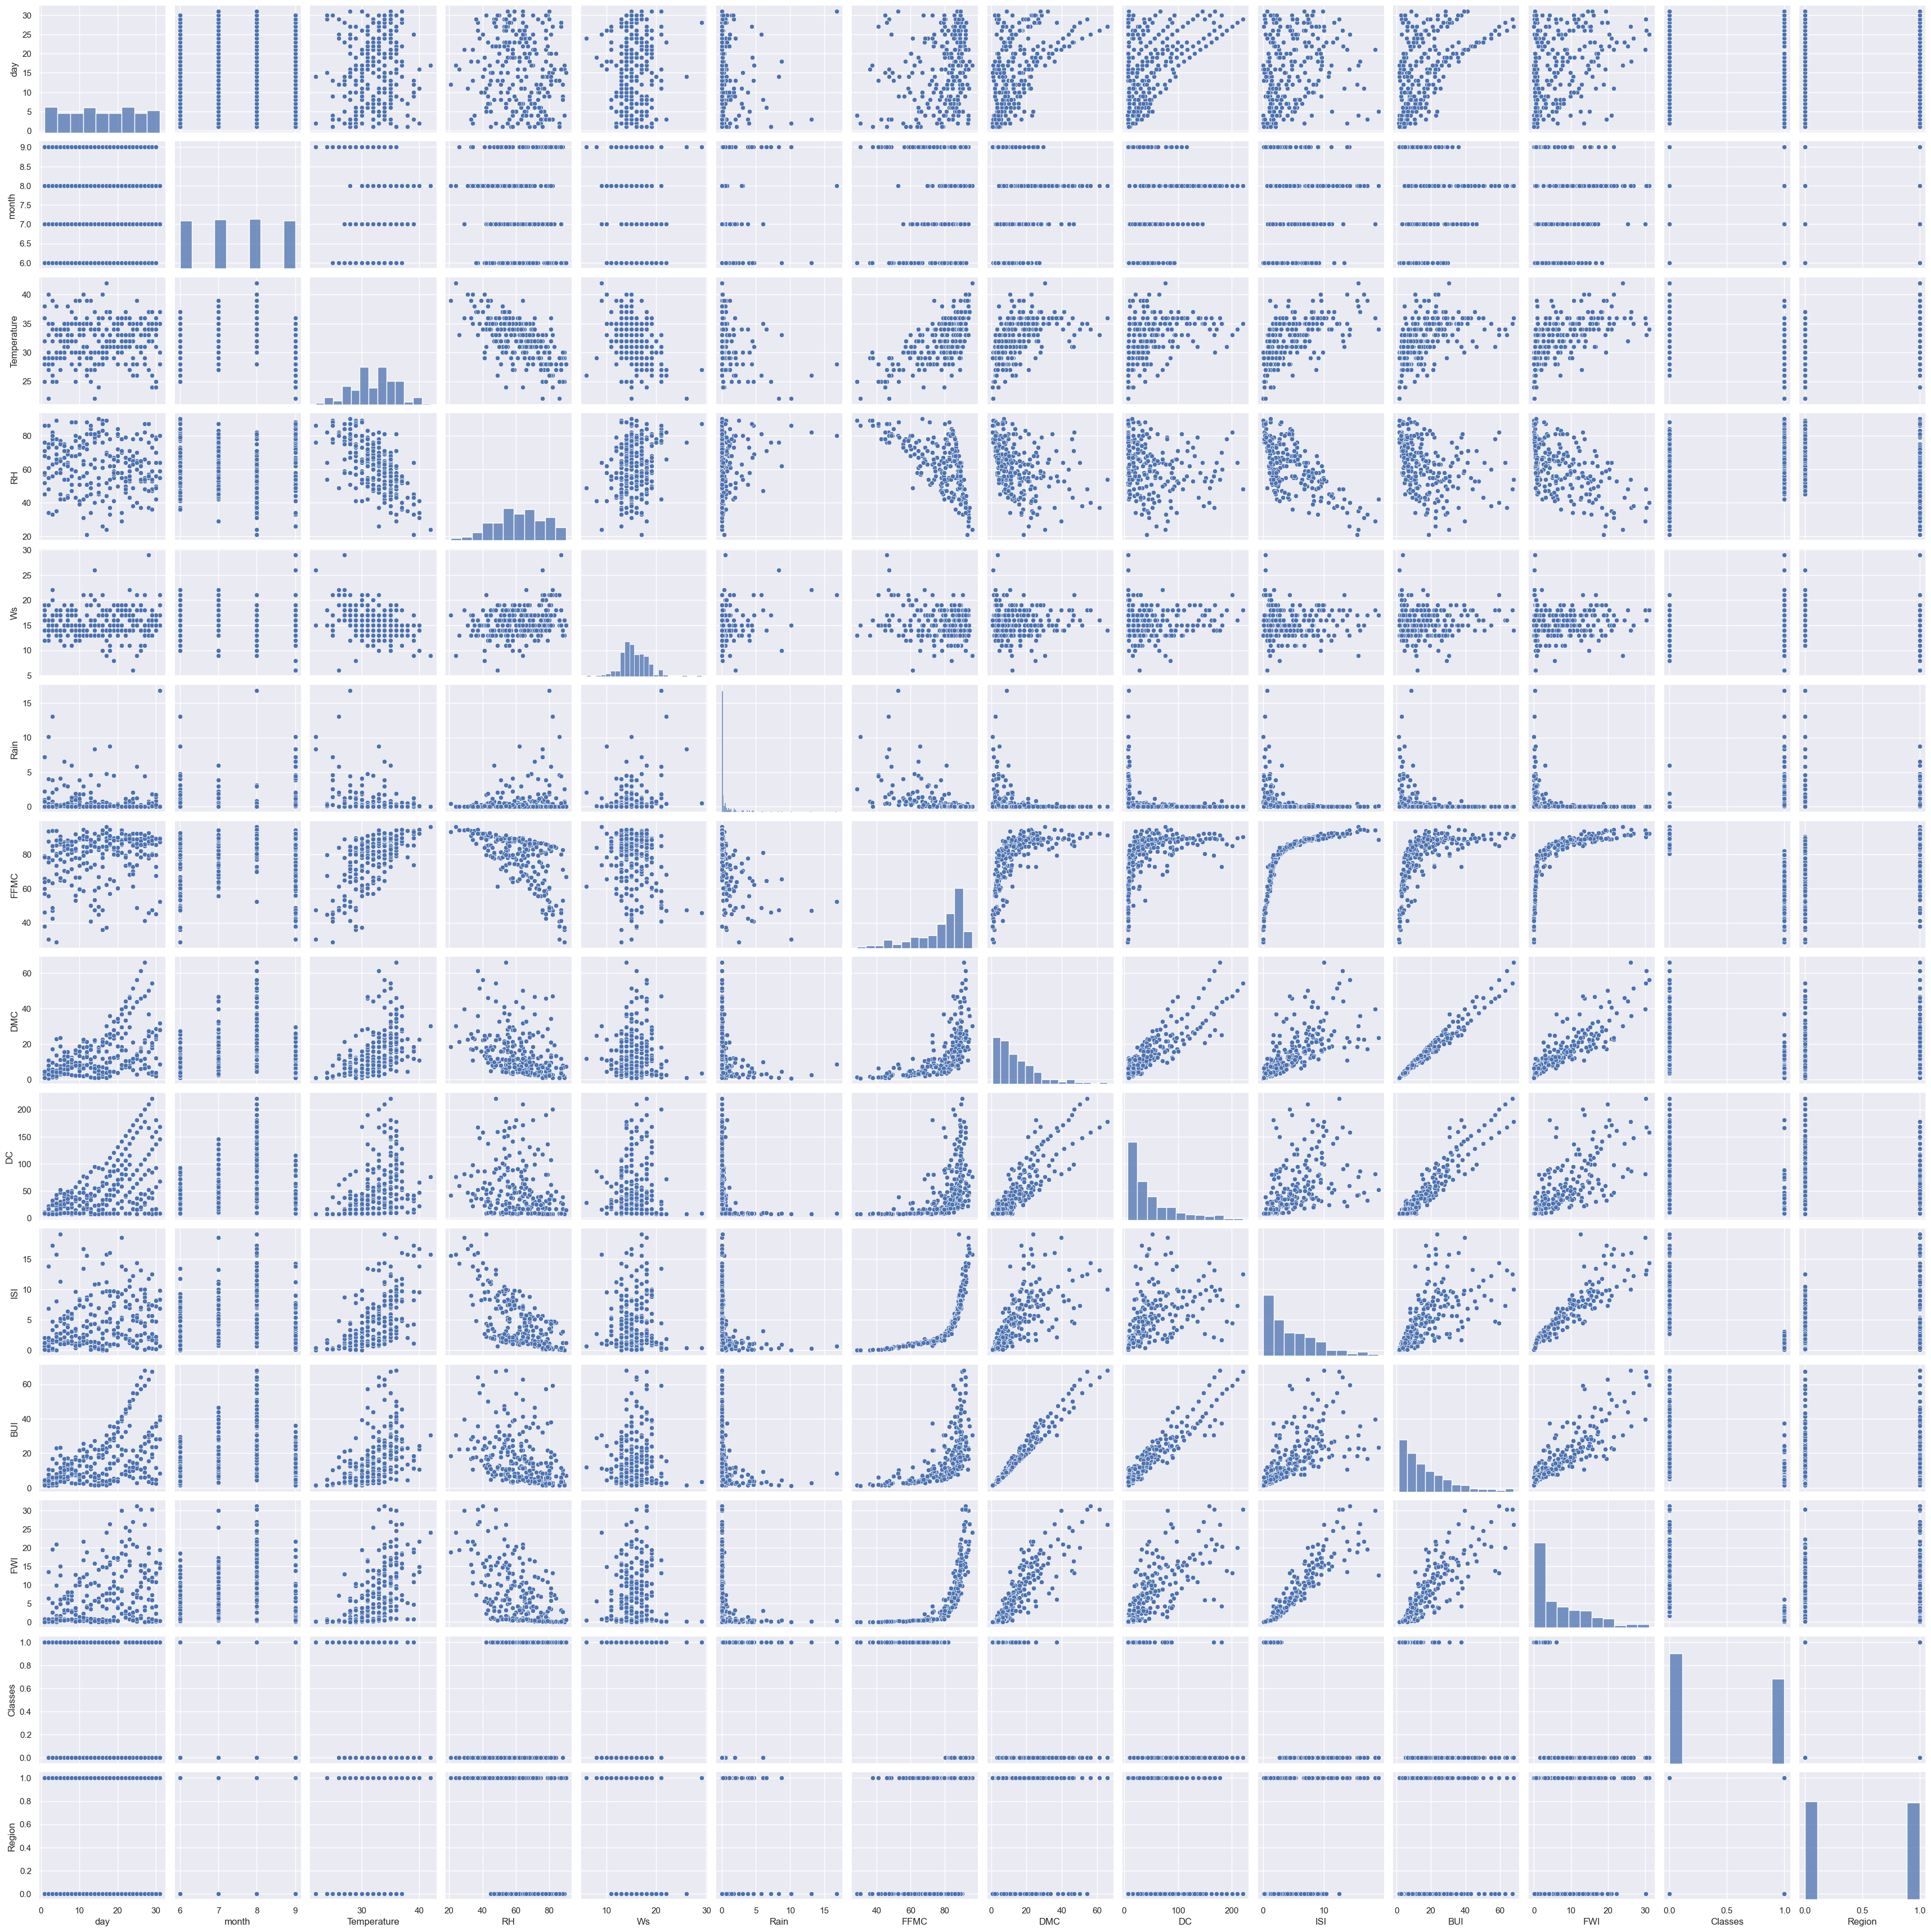

In [90]:
sns.pairplot(df1)

C:\Users\Navneet\AppData\Local\Temp\ipykernel_7148\1899532322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())


<Axes: >

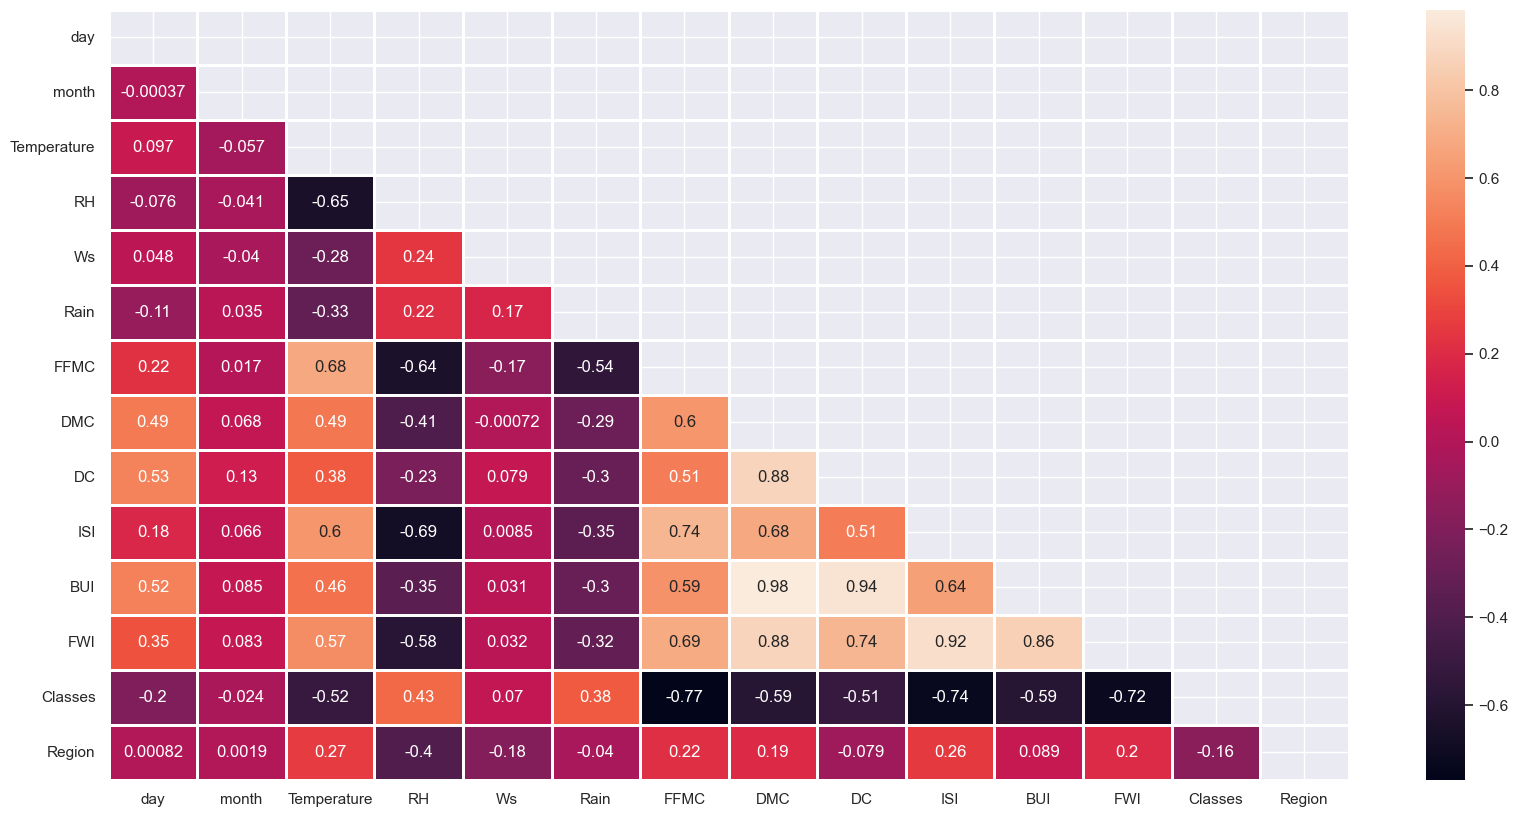

In [91]:
plt.figure(figsize=(20, 10))
matrix = np.triu(df.corr())
sns.heatmap(df1.corr(), annot=True, linewidth=.8, mask=matrix)

Report 
- Rh is negative coorelated with temperature, FFMC and ISI
- Rain is negatively coorelated with Temperature and FFMC, DMC, ISI and BUI

Histogram 
- A histogram os basically used to represent data provide in a form of sme groups

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>],
       [<Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >, <Axes: >]],
      dtype=object)

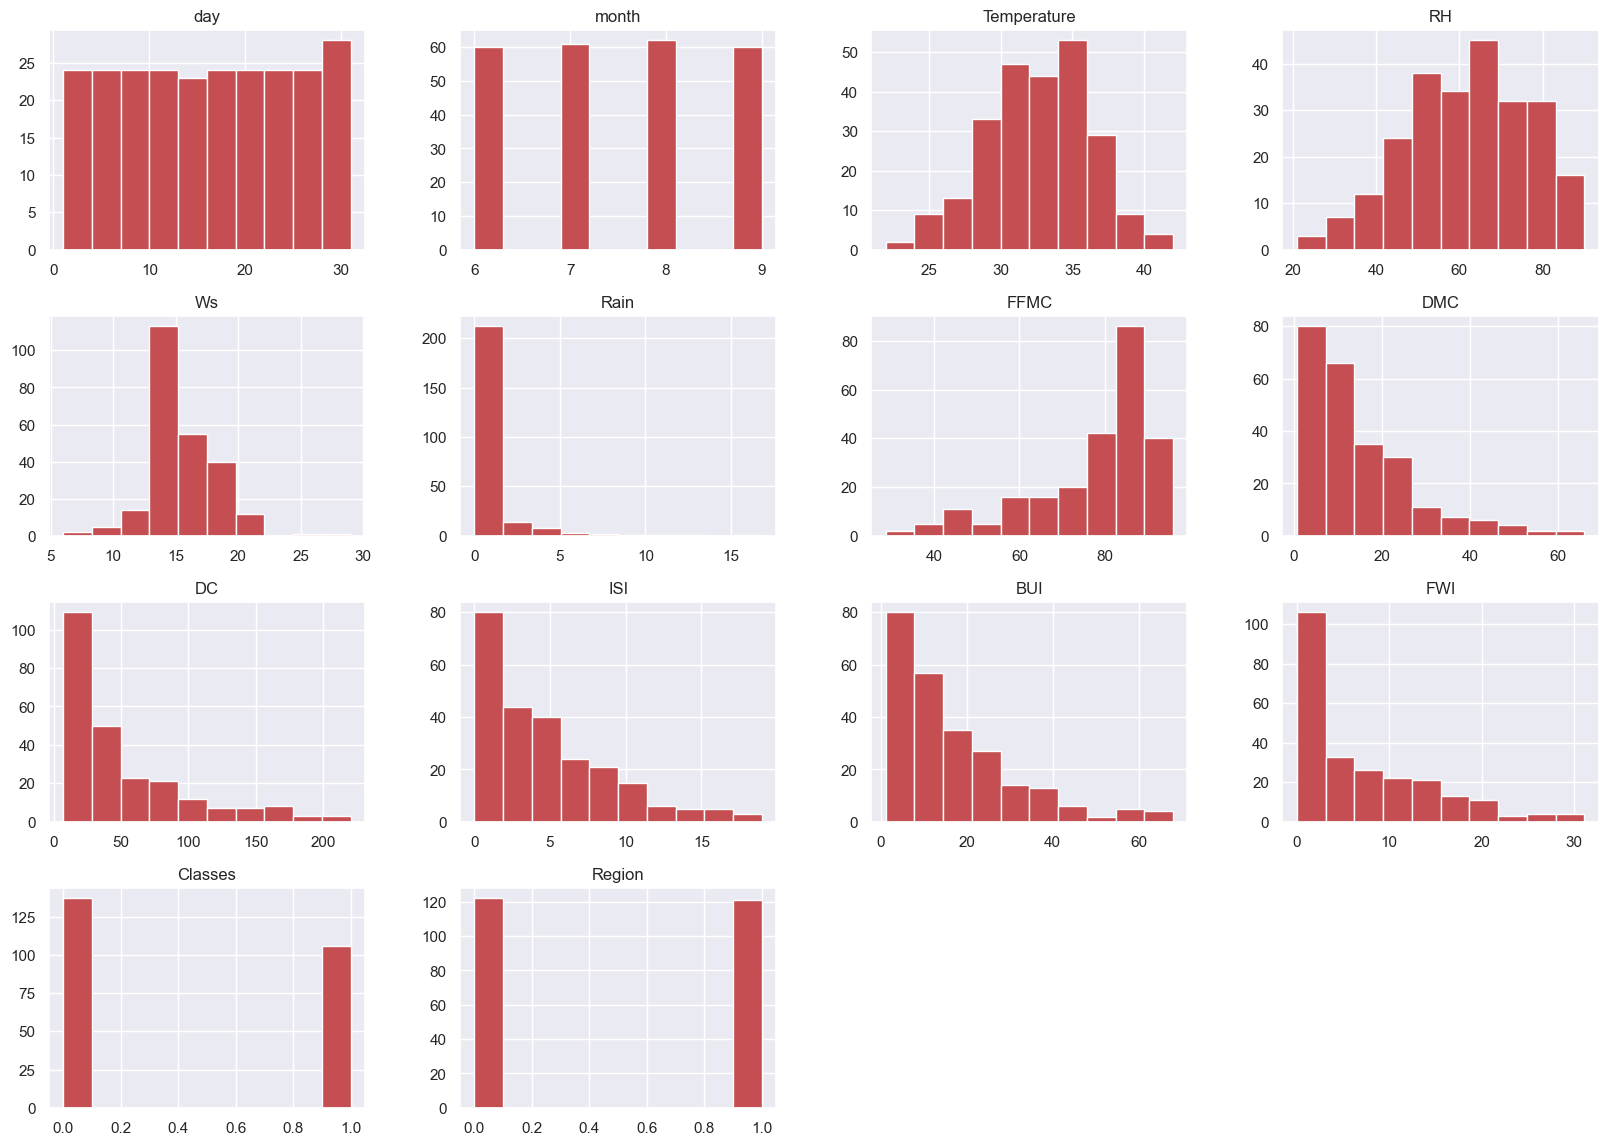

In [92]:
df1.hist(figsize=(20,14), color='r')

Percentage for Pie Chart

In [93]:
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

Plotting pie chart 

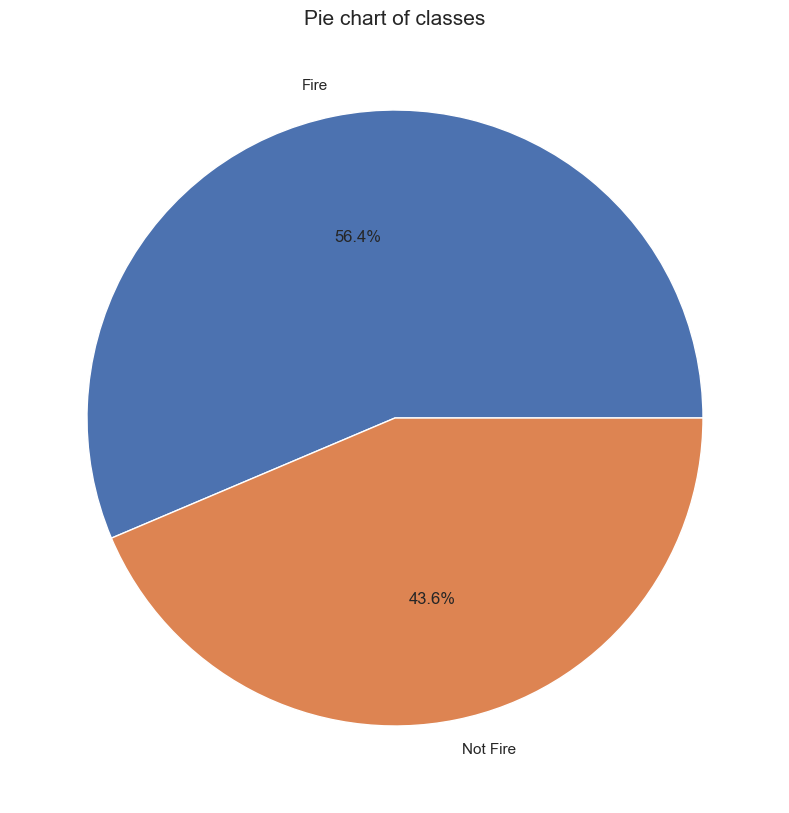

In [94]:
classes_label=['Fire', 'Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage, labels=classes_label, autopct="%1.1f%%")
plt.title("Pie chart of classes", fontsize=15)
plt.show()

# Model Building Using Logistic Regression

In [95]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [96]:
X = df1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [97]:
y = df1['Classes']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 243, dtype: int32

In [98]:
X_train, X_test, ytrain, ytest = train_test_split(X.values, y.values, random_state=32, test_size=.33)

# Feature Scaling

In [99]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Standardisation = scaler.fit_transform(X_train)
    X_test_after_Standardisation = scaler.fit_transform(X_test)
    return X_train_after_Standardisation, X_test_after_Standardisation

In [100]:
X_train_after_Standardization, X_test_after_Standardization = Feature_Scaling(X_train, X_test)

In [101]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_after_Standardization, ytrain)

LogisticRegression()

In [102]:
print('Intercept is: ', logistic_regression.intercept_)
print('Coefficient is: ', logistic_regression.coef_)

Intercept is:  [-1.69998774]
Coefficient is:  [[-0.1914346   0.02785304  0.02704621 -0.21299985 -2.34099273  0.26915864
   0.11560254 -2.323554   -0.26909869 -1.80866713 -0.09778616]]


In [103]:
print("Training Score: ", logistic_regression.score(X_train_after_Standardization, ytrain))
print("Test Score: ", logistic_regression.score(X_test_after_Standardization, ytest))

Training Score:  0.9814814814814815
Test Score:  0.9382716049382716


In [104]:
ypred = logistic_regression.predict(X_test_after_Standardization)
accuracy_score(ytest, ypred)

0.9382716049382716

# Confusion Matrix

In [105]:
conf_mat = confusion_matrix(ytest, ypred)
conf_mat

array([[43,  0],
       [ 5, 33]], dtype=int64)

In [106]:
dump(logistic_regression, 'Algerian_Forest_Fire_Predictin_Model.joblib')

['Algerian_Forest_Fire_Predictin_Model.joblib']